# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



**Цель**: определить, влияют ли семейное положение, количество детей, цель кредита, уроень дохода на факт погашения кредита в срок.

Вся информация содержится в файле data.csv, на основе которой буду проводить данное исследование. Сами данные:
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

Начну с предобработки: поиск пропусков, аномалий, дубликатов. Нужно привести данные в удобоваримый вид для корректного, не искаженного исследования.

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Обнаружено одинаковое количество (≈10% от всего столбца) пропусков в `days_employed` и `total_income`, скорее всего они были допущены одними и теми же людьми. Перепроверим, задав определенное условие:

In [6]:
data[data['days_employed'].isna() & data['total_income'].isna()] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Да, это одни и те же люди - количество строк в индексированном датасете совпадает.

Причиной пропусков может являться человеческий фактор - клиенты либо случайно, либо нарочно не заполнили в анкете свои данные о стаже и зарплате. Также не исключал бы технический фактор: данные поля могли быть просто недоступны для заполнения из-за какого-либо бага.

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Пропуски заполним медианными значениями, так как ее значение не подвержена выбросам в данных.

In [8]:
data.isna().sum() # перепроверим наличие пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

In [9]:
data.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [10]:
data.loc[12] #проверим правильность значения, которым заполнился пропуск
#Возьмем первую же строчку с отсутствующими данными в total_income

children                           0
days_employed                    NaN
dob_years                         65
education                    среднее
education_id                       1
family_status       гражданский брак
family_status_id                   1
gender                             M
income_type                пенсионер
debt                               0
total_income           118514.486412
purpose              сыграть свадьбу
Name: 12, dtype: object

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [11]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [12]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [13]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [14]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [15]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

В столбце `days_employed` наблюдается два типа аномалий: отрицательные значения и неадекватно большие, которые наблюдаются у категорий `безработный` и `пенсионер`. 

Отрицательные значения появились скорее всего при копировании, считывании, смене формата данных из столбца.

Заемщики из категорий `безработный` и `пенсионер` не имеют официального трудоустройства и при заполнении анкеты не указывали свое актуальное место работы. Думаю, имеем дело с багом, который тригерится при незаполнении данного пункта и ломает данные из `days_employed`.

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [16]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [17]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [18]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [19]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [20]:
data.duplicated().sum()

71

In [21]:
data = data.drop_duplicates()

После предобработки занялся поиском дубликатов: функции `.duplicated()` и `.sum()` позволили посчитать их количество в датасете, а `.drop_duplicates()` - удалил их. Понятные и лаконичные функции.

Дубликаты могли появится из-за того, что человек подавал несколько заявок, и вероятно эти несколько заявок, которые имеют одинаковое содержание, попали в данные.

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [22]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [23]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [24]:
data.info() #проверим количество столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int32  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(6)
memory usage: 2.2+ MB


**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [25]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [26]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [27]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [28]:
data.info() #проверим количество столбцов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int32  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
 13  purpose_category       21331 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(7)
memory us

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [29]:
debt_children = data.pivot_table(
    index='children',
    values='debt',
    aggfunc={'count', 'sum'})

debt_children['ratio, %'] = round(
    debt_children['sum'] / debt_children['count']  * 100, 3)

debt_children = debt_children.rename(columns={
    'count':'total',
    'sum':'debt'})

debt_children

,total,debt,"ratio, %"
children,,,
0,14091,1063,7.544
1,4808,444,9.235
2,2052,194,9.454
3,330,27,8.182
4,41,4,9.756
5,9,0,0.000


Значения в children попадают под количественные переменные, считаю, можно отобразить гистограмму, дабы нагляднее была показано наличие или отсутствие зависимости просрочки от количества детей.
Чтобы корректно отобразить график, применим к группе функцию reset_index(), чтобы был доступен столбец children

In [30]:
debt_children = debt_children.reset_index()
debt_children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   children  6 non-null      int64  
 1   total     6 non-null      int64  
 2   debt      6 non-null      int64  
 3   ratio, %  6 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


Импортируем библиотеку seaborn и построем график

<Axes: xlabel='children', ylabel='ratio, %'>

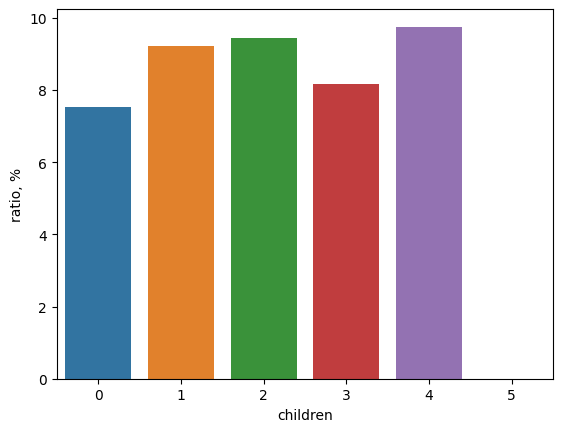

In [31]:
import seaborn as sns
sns.barplot(data=debt_children, y='ratio, %', x='children')

Глядя на график стоит проверить пару моментов: почему корреляция прерывается на тех, у кого 3 ребенка, и отсутствие долгов у тех - у кого 5.

Несмотря на маленькое количество клиентов, у которых указано наличие 5 детей, стоит проверить их доход, так как просрочек нет:

In [32]:
data[data['children'] == 5].value_counts(subset='total_income_category')

total_income_category
B    4
C    4
D    1
dtype: int64

Есть 1 клиент категории D (*в последствии выяснится, что люди с доходом 30000-50000 имеют меньше всего задолженностей*) и по 4 - B и C, которые имеют приличный доход.

Проверим доходность тех, у кого 3 ребенка:

In [33]:
data[data['children'] == 3].value_counts(subset='total_income_category')

total_income_category
C    236
B     88
D      5
A      1
dtype: int64

Больше четверти всех заемщиков из этой категории имеют доход сильно выше среднего - A и B.

**Вывод:** 

Прямая зависимость между количеством детей и задолженностью есть, но с нюансами - об этом ниже:
 - Минимальный показатель просрочки, логично, у тех, кто детей не имеет (не считая родителей 5 детей) - у этих людей финансовая нагрузка меньше относительно других, следовательно и просрочек тоже меньше. Также люди этой категории чаще всего берут кредит.
 - Самый высокий показатель наличия задолженности у тех, кто имеет 4 ребенка - скорее всего это обусловлено высокой финансовой нагрузкой.
 - Отсутствие должников среди таких заемщиков с 5 детьми может объясняться хорошими доходами клиентов - преобладают категории C и B.
 - Категория "3 ребенка" несколько выбивается из корреляции - это объясняется хорошиими доходами данной группы (категории A и B > 25%).

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [34]:
debt_family_status = data.pivot_table(
    index='family_status',
    values='debt',
    aggfunc={'count', 'sum'})

debt_family_status['ratio, %'] = round(
    debt_family_status['sum'] / debt_family_status['count'] * 100, 3)

debt_family_status = debt_family_status.rename(columns={
    'count':'total',
    'sum':'debt'})

debt_family_status.sort_values('ratio, %', ascending=False)

,total,debt,"ratio, %"
family_status,,,
Не женат / не замужем,2796,273,9.764
гражданский брак,4134,385,9.313
женат / замужем,12261,927,7.561
в разводе,1189,84,7.065
вдовец / вдова,951,63,6.625


Есть определенные предположения зависимости семейного статуса от возраста. Проверка того, насколько сильно коррелирует возраст со статусом "вдовец / вдова":

In [35]:
data[data['family_status'] == 'вдовец / вдова'].value_counts(subset='dob_years').sort_values(ascending=False).head(10)

dob_years
58    58
60    50
64    50
62    49
56    48
59    47
57    46
61    46
55    43
53    39
dtype: int64

Как и ожидалось, львиную долю этой категории составляют люди пенсионного и предпенсионного возраста.

In [36]:
data[data['family_status'] == 'в разводе'].value_counts(subset='dob_years').sort_values(ascending=False).head(10)

dob_years
40    43
48    42
43    39
55    38
49    38
45    38
42    38
51    36
41    36
39    36
dtype: int64

Здесь основная доля людей чуть моложе, чем в категории выше.

**Вывод:** 

 - Категория "Не женат / не замужем" подвержена более частым просрочкам, чем остальные - может быть абсолютно любая причина. Но если рассматривать относительно остальных категорий - только на заемщика кладутся финансовые обязательства по выплате кредита.
 - Категории "вдовец / вдова" и "в разводе" являются самыми благонадежными, но и реже всех берут кредит.
 - Основной костяк этих двух групп - люди возрастом 50+ и 40+ соответственно. Допускаю, в этом возрасте люди, полагаясь на свой опыт, более ответственно подходят к операциям с кредитами, выбирают более приземленные, реализуемые цели.
 - В противовес этому стоят категории "Не женат / не замужем" и "гражданский брак", которым характерны клиенты молодого возраста (20+ лет): у подобных заемщиков впервые появляется возможность взять кредит на те или иные цели и это сопрягается с  отсутсвием опыта в своем финансовом планировании.
 - Корреляцию между семейным статусом и возвратом кредита проследить можно.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [37]:
debt_total_income = data.pivot_table(
    index='total_income_category',
    values='debt',
    aggfunc={'count', 'sum'})

debt_total_income['ratio, %'] = round(
    debt_total_income['sum'] / debt_total_income['count'] * 100, 3)

debt_total_income = debt_total_income.rename(columns={
    'count':'total',
    'sum':'debt'})

debt_total_income.insert(0,'decoding', ['>1000001','200001-1000000','50001-200000','30001-50000','0-30000'])

debt_total_income

,decoding,total,debt,"ratio, %"
total_income_category,,,,
A,>1000001,25,2,8.000
B,200001-1000000,5014,354,7.060
C,50001-200000,15921,1353,8.498
D,30001-50000,349,21,6.017
E,0-30000,22,2,9.091


Так как категории основаны на конкретных суммах, думаю, стоит построить график зависимости между уровнем дохода и возвратом кредита в срок.
Категории B и C являются самыми большими относительно других (почти 100%). поэтому будет правильным рассматривать корреляцию только по ним.

<Axes: xlabel='total_income_category', ylabel='ratio, %'>

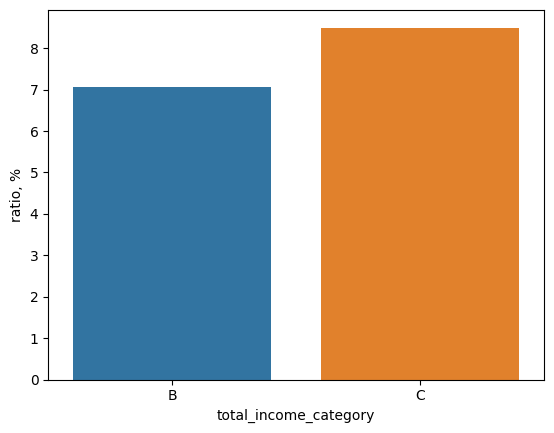

In [38]:
debt_total_income = debt_total_income.reset_index()
sns.barplot(
    data=debt_total_income[debt_total_income['total_income_category'].isin(['B', 'C'])],
    y='ratio, %',
    x='total_income_category'
)

**Вывод:** 

- Более состоятельная группа B допускает меньше просрочек, чем C.
- Зависимость прослеживается.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [39]:
debt_purpose = data.pivot_table(
    index='purpose_category',
    values='debt',
    aggfunc={'count', 'sum'})

debt_purpose['ratio, %'] = round(
    debt_purpose['sum'] / debt_purpose['count'] * 100, 3)

debt_purpose = debt_purpose.rename(
    columns={
        'count':'total',
        'sum':'debt'})

debt_purpose.sort_values('ratio, %', ascending=False)

,total,debt,"ratio, %"
purpose_category,,,
операции с автомобилем,4279,400,9.348
получение образования,3988,369,9.253
проведение свадьбы,2313,183,7.912
операции с недвижимостью,10751,780,7.255


"Операции с недвижимостью" оказалась самой надежной и самой многочисленной. Думаю, стоит проверить эту категорию на предмет семейного статуса.

In [40]:
data[data['purpose_category'] == 'операции с недвижимостью'].value_counts(subset='family_status')

family_status
женат / замужем          6970
Не женат / не замужем    1586
гражданский брак          988
в разводе                 672
вдовец / вдова            535
dtype: int64

**Вывод:** 

- Чаще всего обращаются за кредитом с целью провести операции с недвижимостью. Эта же самая категория является самой благонадежной среди представленных: подавляющее большинство, совершающие данные операции, являются людьми семейными, поэтому данная финансовая нагрузка кладется на плечи всех работающих членов семьи (мужа и жены в частности) и не стоит забывать о маткапитале, который часто фигурирует в данных сделках.
- "Проведение свадьбы" попадает под те же выводы: вся семья выплачивает кредит.
- "Операции с автомобилем" и "Получение образования" - вещи часто более индивидуальные (особенно второе), даже если человек состоит в семейных отношениях, поэтому кредит заемщик выплачивает один.
- Корреляция прослеживается

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Только столбцы `days_employed` и `total_income` имеют пропуски, причем одинаковое количество и на одних и тех же строках. Полагаю, здесь замешан человеческий фактор: клиент или забыл, или нарочно не стал указывать свои стаж и доход.
Также не исключал бы технический фактор: заполнение одного пункта влияет на другой, или баг, из-за которого клиент просто не смог заполнить свои данные.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* медианное значение делит всю выборку ровно пополам, среднее подвержено слишком большим/слишком малым значениям.

### Шаг 4: общий вывод.

Данные, с которыми была проведена работа - статистика о платёжеспособности клиентов от кредитного отдела банка.

На этапе предобработки столкнулись с такими проблемами, как пропуски, аномальные значения (отрицательные и неадекватно большие числа), явные и неявные дубликаты. Чтобы минимизировать подобные вещи, нужно сделать обязательным для возможного клиента заполнение граф рабочего стажа и дохода и подлатать техническую часть:
 - Все поля должны быть доступны для заполнения
 - Ввод данных формата `str` должен заполняться в одном едином регистре
 - Пофиксить баг, реагирующий на безработных и пенсионеров и ломающих данные из `days_employed`
 - Придумать форматирование, которое не будет допускать в данных отрицательные значения

Зависимость между количеством детей и возвратом кредита в срок прослеживается. Но на данную корреляцию обязательно нужно смотреть через призму уровня доходов - те, у кого выше финансовая нагрузка (3 ребенка), реже допускают просрочки чем те, у кого эта нагрузка меньше (1 и 2 ребенка).

Зависимость между семейным положением и возвратом кредита в срок прослеживается. Но здесь важно учитывать характерный возраст групп. Категориям `Не женат / не замужем` и `гражданский брак` характерны, в силу своей специфики, молодые люди, часть из которых, возможно, не до конца осознает свои финансовые возможности, поэтому у них чаще всего случаются просрочки. В `в разводе` и `вдовец / вдова` люди зрелые, они чаще подходят к кредиту более рационально.

Зависимость между уровнем дохода и возвратом кредита в срок прослеживается: более состоятельная категория B допускает просрочки реже, чем менее состоятельная - C. Данную зависимость рассматривали только в контексте этих двух групп, т.к. остальные - малочисленные и добавляли бы "шум" на итоговый вывод.

Зависимость между целями кредита и его возвратом в срок прослеживается: заемщики с более индивидуальными целями (`операции с автомобилем`, `получение образования`) допускают просрочки чаще, чем те клиенты, у кого цели более общие, семейные (`проведение свадьбы`, `операции с недвижимостью`), т.к. финансовая нагрузка кладется на плечи всех трудоустроенных.

Идеальный портрет заемщика: не обремененный детьми клиент c зарплатой 200001–1000000, цель кредита которого - операции с недвижимостью.
Портрет заемщика с высокими рисками: не состоит в отношениях, имеет 4 ребенка</s>